**Psychological Factors** => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',  
**Physiological Factors** => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem  
**Environmental Factors** => 'noise_level', 'living_conditions', 'safety', 'basic_needs',  
**Academic Factors** => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',  
**Social Factor** => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'  

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv('data/StressLevelDataset.csv')


In [3]:
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [6]:
df.duplicated().any()

False

In [7]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

# Group Features by Factors 
**Psychological Factors** => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',  
**Physiological Factors** => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem  
**Environmental Factors** => 'noise_level', 'living_conditions', 'safety', 'basic_needs',  
**Academic Factors** => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',  
**Social Factor** => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'  

# Calculate Negative Experience for each factors

# Feature Importance

# STOP


In [8]:
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

In [9]:
num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

In [47]:
num_students_with_negative_psychological

0       1
1       1
2       1
3       1
4       1
       ..
1095    1
1096    1
1097    1
1098    2
1099    1
Length: 1100, dtype: int64

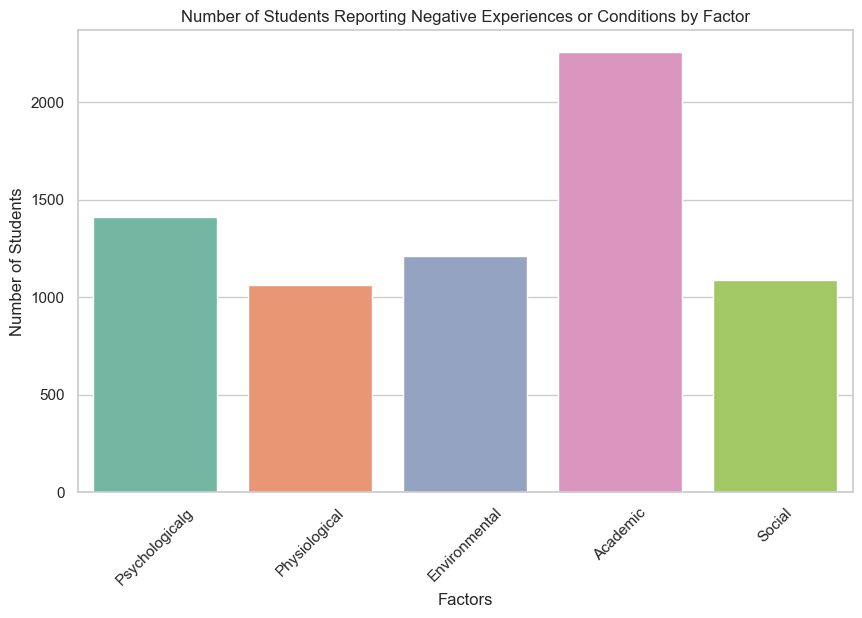

In [45]:
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum()
]

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=negative_experiences)
plt.title("Number of Students Reporting Negative Experiences or Conditions by Factor")
plt.xlabel("Factors")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

# Psychological Factors
1) How many students have a self-esteem level below the average?


In [11]:
average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)



2) What percentage of students have reported experiencing depression?

In [12]:
# Define the threshold and create the new binary column
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)


percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

2) Percentage of students experiencing depression: 56.36%


# Physiological Factors
1) How many students experience headaches frequently?
2) What is the average blood pressure reading among the students?
3) How many students rate their sleep quality as poor?

In [13]:
# 1
students_with_frequent_headaches = df[df['headache'] == 1]
num_students_with_frequent_headaches = len(students_with_frequent_headaches)

# 2
average_blood_pressure = df['blood_pressure'].mean()

# 3
students_with_poor_sleep_quality = df[df['sleep_quality'] < 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)

print("1) Number of students experiencing frequent headaches:", num_students_with_frequent_headaches)
print("2) Average blood pressure reading among the students:", average_blood_pressure)
print("3) Number of students with poor sleep quality:", num_students_with_poor_sleep_quality)

1) Number of students experiencing frequent headaches: 331
2) Average blood pressure reading among the students: 2.1818181818181817
3) Number of students with poor sleep quality: 550


# Environmental Factors
1) How many students live in conditions with high noise levels?
2) What percentage of students feel unsafe in their living conditions?
3) How many students have reported not having their basic needs met?

In [14]:
# 1
students_in_high_noise_conditions = df[df['noise_level'] > 3]
num_students_in_high_noise_conditions = len(students_in_high_noise_conditions)

# 2
percentage_students_feeling_unsafe = (df['safety'].sum() / num_students) * 100

# 3
students_without_basic_needs = df[df['basic_needs'] == 0]
num_students_without_basic_needs = len(students_without_basic_needs)

print("1) Number of students living in high noise conditions:", num_students_in_high_noise_conditions)
print("2) Percentage of students feeling unsafe in their living conditions:", percentage_students_feeling_unsafe)
print("3) Number of students without their basic needs met:", num_students_without_basic_needs)

1) Number of students living in high noise conditions: 274
2) Percentage of students feeling unsafe in their living conditions: 273.72727272727275
3) Number of students without their basic needs met: 40


# Review or Remove
### NOTE
in order to have the Percentage of students feeling unsafe in their living conditions in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [15]:
# Create a binary column for safety (1 indicates feeling unsafe, 0 indicates feeling safe)
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)


percentage_students_feeling_unsafe = (df['feeling_unsafe'].sum() / num_students) * 100

print(f"2) Percentage of students feeling unsafe in their living conditions: {percentage_students_feeling_unsafe:.2f}%")

2) Percentage of students feeling unsafe in their living conditions: 51.36%


# Academic Factors
1) How many students rate their academic performance as below average?
2) What is the average study load reported by students?
3) How many students have concerns about their future careers?

In [16]:
# 1
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)

# 2
average_study_load = df['study_load'].mean()

# 3
students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("1) Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("2) Average study load reported by students:", average_study_load)
print("3) Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

1) Number of students with below-average academic performance: 561
2) Average study load reported by students: 2.6218181818181816
3) Number of students with concerns about their future careers: 327


# Social Factors
1) How many students feel they have strong social support?
2) What percentage of students have experienced bullying?
3) How many students participate in extracurricular activities?

In [17]:
# 1
students_with_strong_social_support = df[df['social_support'] > 3]
num_students_with_strong_social_support = len(students_with_strong_social_support)

# 2
percentage_students_experiencing_bullying = (df['bullying'].sum() / num_students) * 100

# 3
students_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
num_students_participating_in_extracurricular = len(students_participating_in_extracurricular)

print("1) Number of students with strong social support:", num_students_with_strong_social_support)
print("2) Percentage of students experiencing bullying:", percentage_students_experiencing_bullying)
print("3) Number of students participating in extracurricular activities:", num_students_participating_in_extracurricular)

1) Number of students with strong social support: 0
2) Percentage of students experiencing bullying: 261.72727272727275
3) Number of students participating in extracurricular activities: 184


# NOTE
in order to have the Percentage of students experiencing bullying in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [18]:
# Define the threshold and create the new binary column for bullying
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)

# Compute the percentage using the new binary column
percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")

2) Percentage of students experiencing bullying: 32.73%


# Comparative Analysis
1) Is there a correlation between anxiety level and academic performance?
2) Do students with poor sleep quality also report higher levels of depression?
3) Are students who experience bullying more likely to have a history of mental health issues?

In [19]:
# 1
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])

# 2
correlation_sleep_depression = df['sleep_quality'].corr(df['depression'])

# 3
students_with_bullying_history = df[df['bullying'] == 1]
students_with_bullying_history_and_mental_health_history = students_with_bullying_history[
    students_with_bullying_history['mental_health_history'] == 1]
percentage_students_with_bullying_and_mental_health_history = (
    len(students_with_bullying_history_and_mental_health_history) / len(students_with_bullying_history)) * 100

print("1) Correlation between anxiety level and academic performance:", correlation_anxiety_academic)
print("2) Correlation between sleep quality and depression:", correlation_sleep_depression)
print("3) Percentage of students with bullying history and mental health history:", percentage_students_with_bullying_and_mental_health_history)

1) Correlation between anxiety level and academic performance: -0.6496011296145088
2) Correlation between sleep quality and depression: -0.6931609071393334
3) Percentage of students with bullying history and mental health history: 4.179104477611941


# General Exploration
1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
2) Are there any noticeable trends or patterns when comparing different factors?
3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [20]:
# 1

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [num_students_below_average_self_esteem, 
                        num_students_with_frequent_headaches, 
                        num_students_in_high_noise_conditions, 
                        num_students_without_basic_needs, 
                        len(students_with_bullying_history)]
factor_with_most_negatives = factors[negative_experiences.index(max(negative_experiences))]

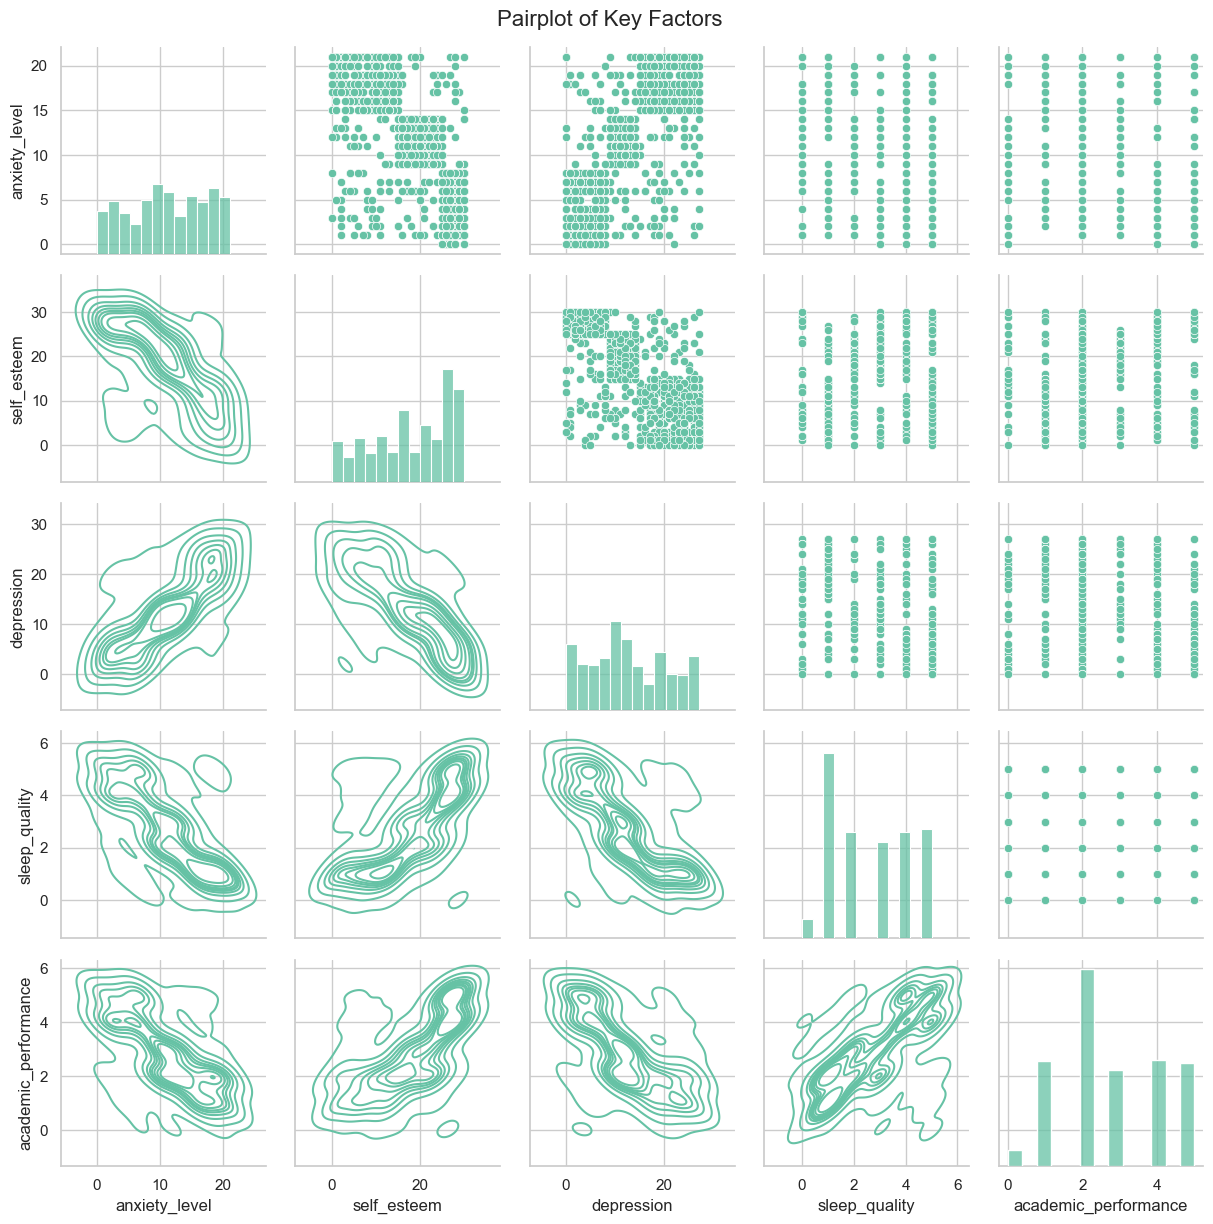

In [48]:
# 2&3

# Set a custom style for the plot
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)

# Show the plot
plt.show()





In [49]:
# use perform feature importance analysis To determine which specific feature within each factor has the most significant impact.

# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_

    
    # Store feature importances in the dictionary
    
    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

Factor: Psychological
- Feature: anxiety_level, Importance: 0.23872402866948456
- Feature: self_esteem, Importance: 0.5350821297057742
- Feature: mental_health_history, Importance: 0.023015894182255886
- Feature: depression, Importance: 0.2031779474424854

Factor: Physiological
- Feature: headache, Importance: 0.3761562949863353
- Feature: blood_pressure, Importance: 0.05061141877343942
- Feature: sleep_quality, Importance: 0.502188786406859
- Feature: breathing_problem, Importance: 0.07104349983336614

Factor: Environmental
- Feature: noise_level, Importance: 0.15469217120418796
- Feature: living_conditions, Importance: 0.12170247002024383
- Feature: safety, Importance: 0.36246718614957435
- Feature: basic_needs, Importance: 0.36113817262599385

Factor: Academic
- Feature: academic_performance, Importance: 0.41356410373778874
- Feature: study_load, Importance: 0.10693401133729614
- Feature: teacher_student_relationship, Importance: 0.25157738583296846
- Feature: future_career_concerns

In [54]:
all_features  = list(df.columns.values)
all_features

['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying',
 'stress_level',
 'depression_binary',
 'feeling_unsafe',
 'bullying_binary']

In [62]:
all_features = df.drop(['stress_level','depression_binary', 'feeling_unsafe','bullying_binary'], axis = 1)
all_features


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,2,3,2,2,2,3,3,2,3,3
1096,9,12,0,8,0,3,0,0,0,1,3,4,0,1,1,1,1,3,4,3
1097,4,26,0,3,1,2,5,2,2,3,4,4,5,1,4,1,3,1,2,1
1098,21,0,1,19,5,3,1,4,3,1,1,1,2,5,1,4,1,4,4,4


In [85]:
X = all_features
y = df['stress_level']
model.fit(X, y)


# Get feature importances
importance = model.feature_importances_
t = list(importance)

In [74]:
feature =list(all_features.columns.values)
feature

['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying']

In [90]:
my_dict = dict(zip(feature, importance))
my_dict

{'anxiety_level': 0.025133119289973617,
 'self_esteem': 0.16406518228235675,
 'mental_health_history': 0.0024341216725564047,
 'depression': 0.029922222190252975,
 'headache': 0.06388616987926038,
 'blood_pressure': 0.00495279647014018,
 'sleep_quality': 0.20435151633266832,
 'breathing_problem': 0.010183029256146775,
 'noise_level': 0.015581165467201672,
 'living_conditions': 0.008702944568926905,
 'safety': 0.050734204863545435,
 'basic_needs': 0.08827552114825828,
 'academic_performance': 0.08652674951222146,
 'study_load': 0.009275948144748815,
 'teacher_student_relationship': 0.06596489435480485,
 'future_career_concerns': 0.019908585946306213,
 'social_support': 0.009369376550370092,
 'peer_pressure': 0.02521306193586344,
 'extracurricular_activities': 0.03321586017381028,
 'bullying': 0.08230352996058725}

In [101]:
df_s =pd.DataFrame(my_dict, index = [1]).T
df_s

,1
anxiety_level,0.025133
self_esteem,0.164065
mental_health_history,0.002434
depression,0.029922
headache,0.063886
blood_pressure,0.004953
sleep_quality,0.204352
breathing_problem,0.010183
noise_level,0.015581
living_conditions,0.008703



1) Correlation between anxiety level and academic performance: -0.6496011296145088
2) Correlation between sleep quality and depression: -0.6931609071393334
3) Percentage of students with bullying history and mental health history: 4.179104477611941

# Box Plots
use box plots to identify trends and variations in factors. This is useful for comparing distributions

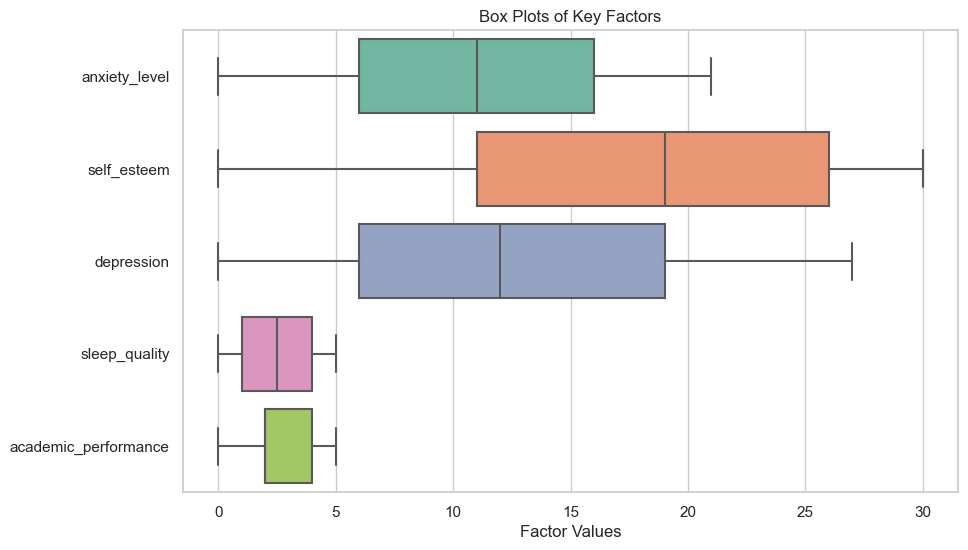

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']], orient='h')
plt.title("Box Plots of Key Factors")
plt.xlabel("Factor Values")
plt.show()

# Determining Specific Feature Impact

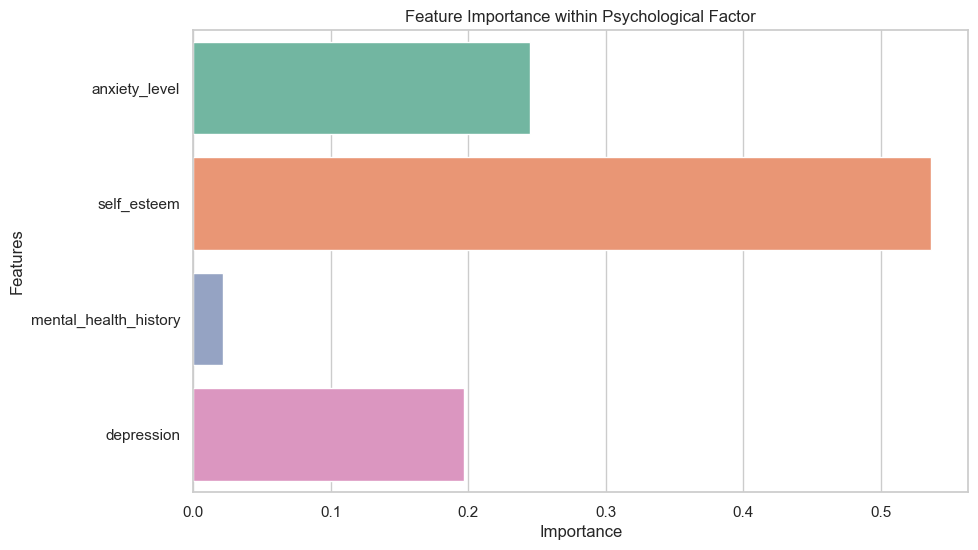

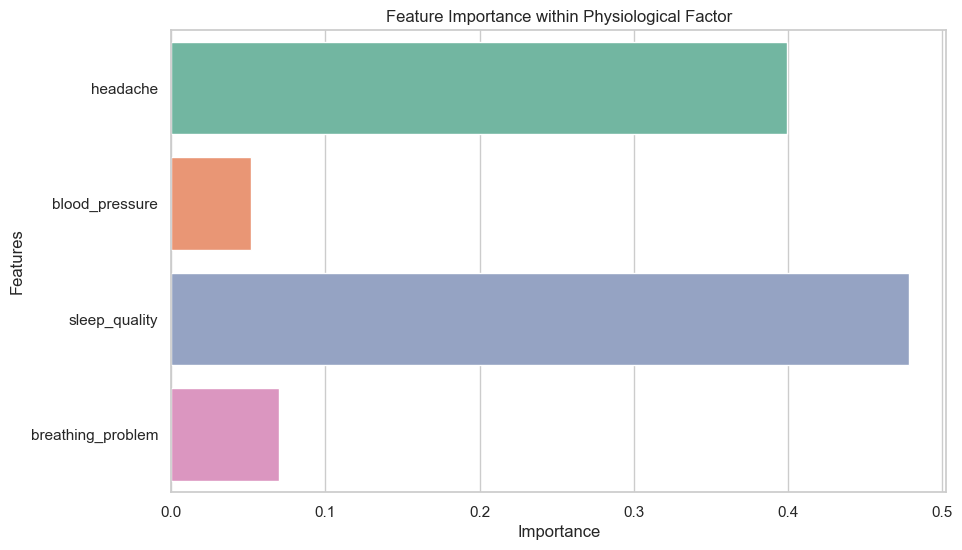

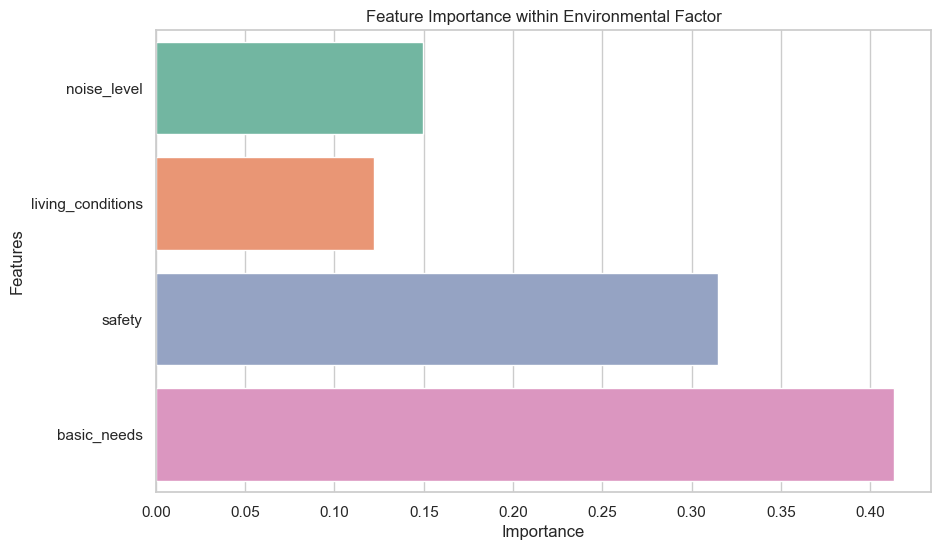

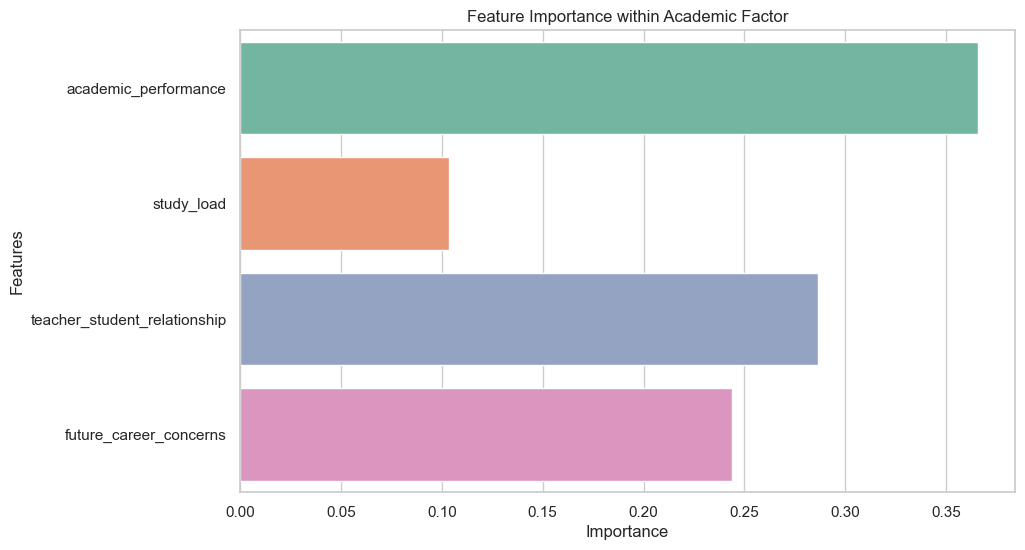

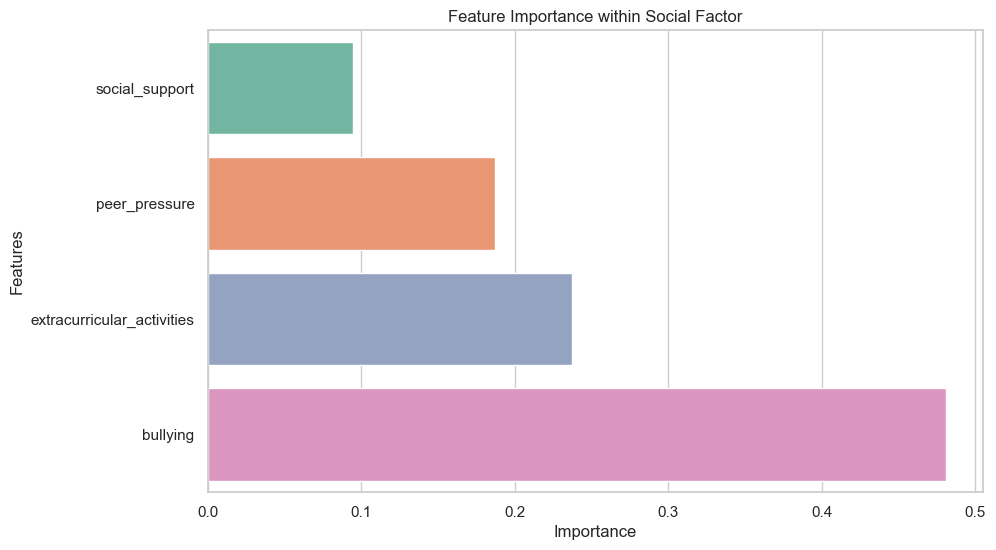

In [24]:
# Define feature importance for each factor

psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']



# Create bar charts for feature importance within each factor

def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, orient='h')
    plt.title(f"Feature Importance within {factor_name} Factor")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)

# STOP

# Visualize Data

### Check distribution of the dependent Variable using Histogram

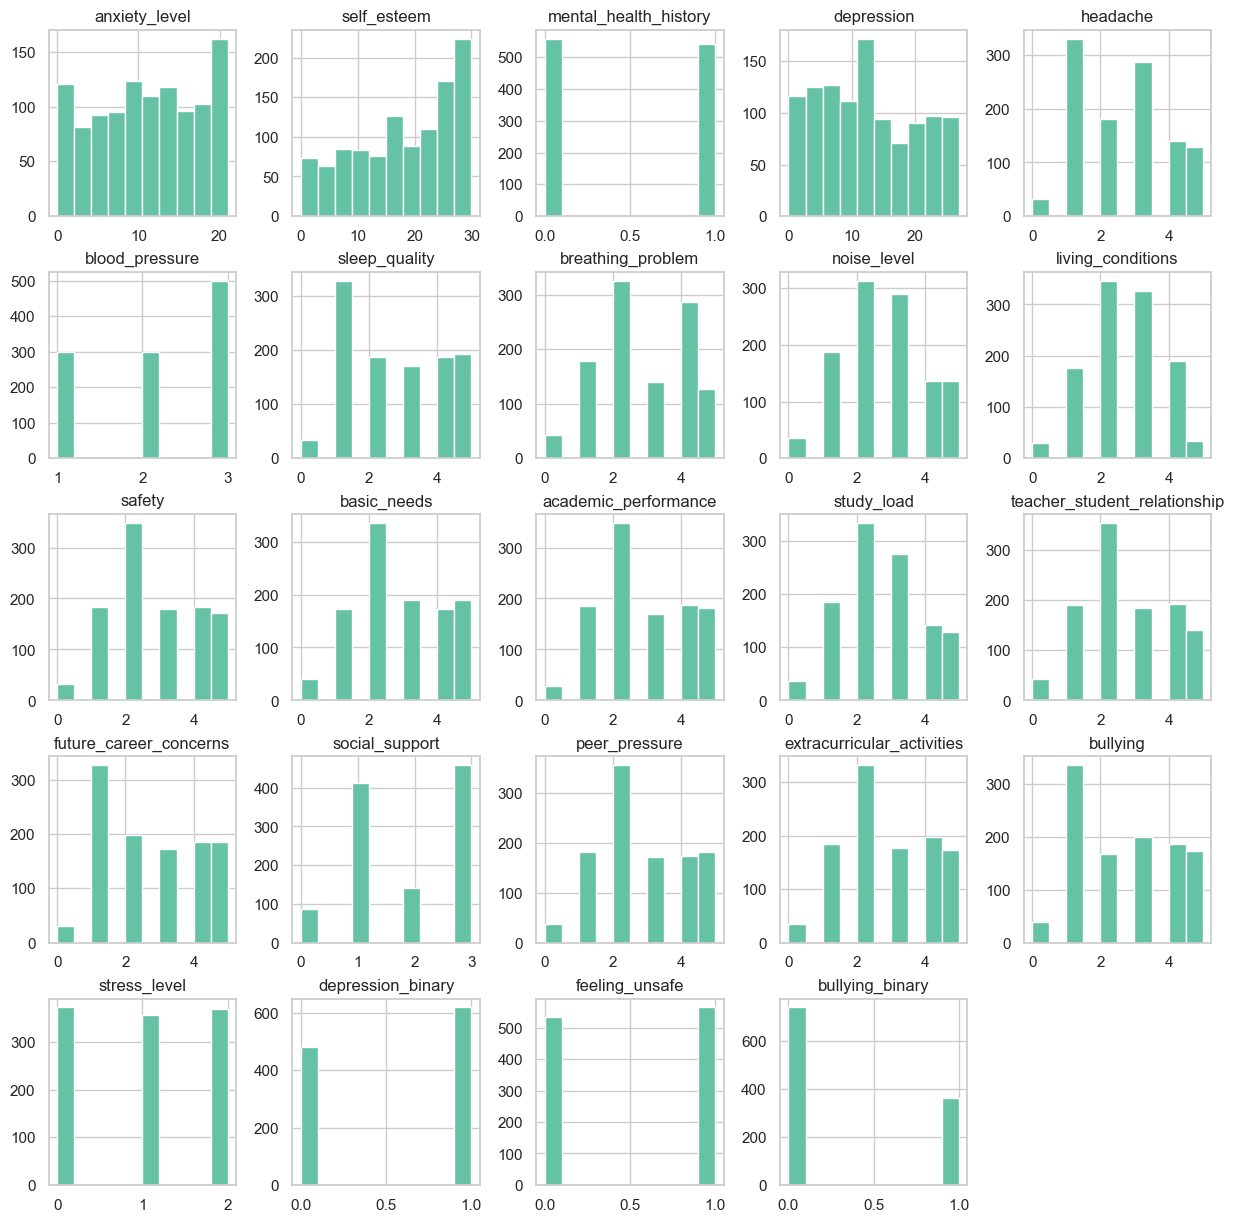

In [25]:
g = df.hist(figsize = (15,15))

### Correlation

# Descriptive Statistics

#### Number of Students sampled for analysis

In [26]:
num_students = len(df)

#### What is the average anxiety level of students in the dataset?

In [27]:
average_anxiety_level = df['anxiety_level'].mean()

#### Students with an history of mental ilness

In [28]:
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

# Split Data

In [37]:
selected_features = ['self_esteem', 'depression', 'academic_performance']
X = df[selected_features]
y = df['stress_level']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [40]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.14447754447021233


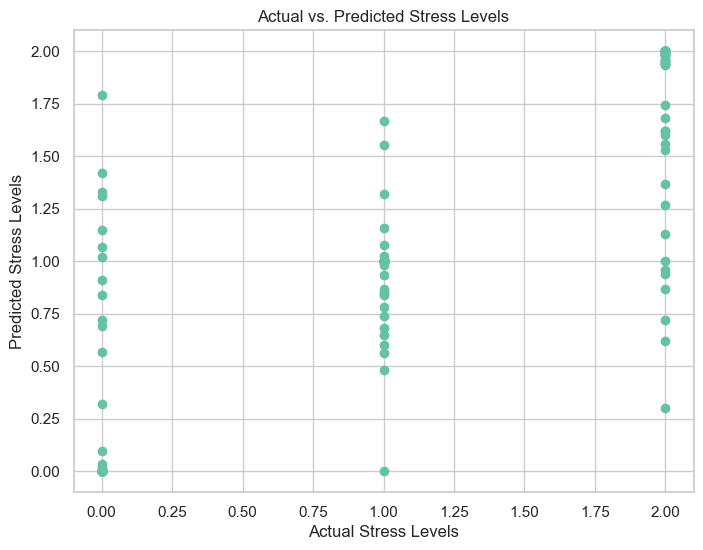

In [44]:
# Visualize actual vs. predicted stress levels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Stress Levels")
plt.ylabel("Predicted Stress Levels")
plt.title("Actual vs. Predicted Stress Levels")
plt.show()

# Scale the data

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train ML

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report


In [34]:
# Create a Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=306)

# Train the model on the training data
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=306)

### Prediction on the Training Split

In [35]:
# Make predictions on the train data split
RF_TrainPredict_y = RF_model.predict(x_train)

# Model Evaluation
accuracy_train = accuracy_score(y_train, RF_TrainPredict_y)
# precision = precision_score(y_train, RF_TrainPredict_y)
accuracy_train

1.0

### Prediction on the Test Split

In [36]:
# Make predictions on the test data split
RF_TestPredict_y = RF_model.predict(x_test)


# Model Evaluation
accuracy = accuracy_score(y_test, RF_TestPredict_y)
# precision = precision_score(y_test, RF_TestPredict_y)
# recall = recall_score(y_test, RF_TestPredict_y)
# f1 = f1_score(y_test, RF_TestPredict_y)
# roc_auc = roc_auc_score(y_test, RF_TestPredict_y)

# print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}\nROC-AUC: {roc_auc}')

accuracy

0.8818181818181818